In [2]:
%matplotlib inline
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt

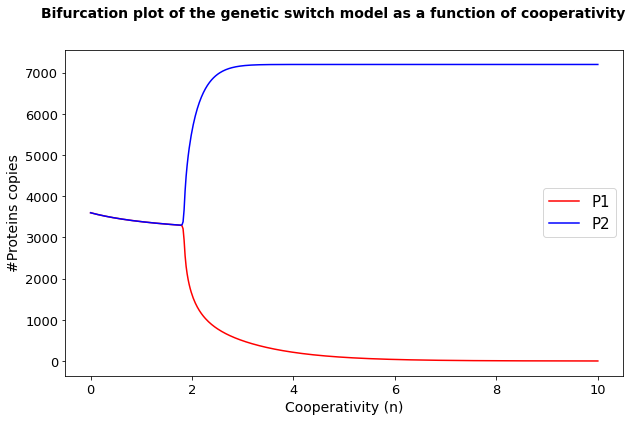

In [3]:
# Figure 5

def sdot_toggle(s,t,params):
    # variables and parameters
    P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2 = params
    
    # rate equations of the toggle switch
    rate_P1_production = kp1 * ((K2**n2)/(P2**n2 + K2**n2))
    rate_P2_production = kp2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dP1, dP2]
    return dsdt

# initial condition and store in s0
P1 = 100
P2 = 1000
s0 = [P1, P2]

# time points
t_start = 0
t_end = 10000
n_obs = 1000
t_obs = np.linspace(t_start, t_end, n_obs)

# define a range of value for n (from 0 to 10)
# create empty lists for P1 and P2 values
n_vals = np.linspace(0,10,500)
P1_vals = []
P2_vals = []

for n in n_vals:
    # define parameters' values
    kp1 = 120.0
    kp2 = 120.0
    K1 = 3000.0
    K2 = 3000.0
    n1 = n
    n2 = n
    kdp1 = 1.0/60.0
    kdp2 = 1.0/60.0
    params = [kp1, kp2, kdp1, kdp2, K1, K2, n1, n2]
    
    # calculate P1 and P2 for each n using odeint
    for i in range(10):
        s_obs = odeint(sdot_toggle, s0, t_obs, args=(params,))
        P1_obs = s_obs[:,0]
        P2_obs = s_obs[:,1]
        
    # store final protein levels
    P1_vals.append(P1_obs[-1])
    P2_vals.append(P2_obs[-1])

#print(P1_obs[-1])
#print(P2_obs[-1])

# plot results
fig5 = plt.figure(figsize=(10,6))
fig5.suptitle('Bifurcation plot of the genetic switch model as a function of cooperativity ', 
              fontsize=14, fontweight='bold')
ax = fig5.add_subplot(1,1,1)

ax.set_xlabel('Cooperativity (n)')
ax.set_ylabel('#Proteins copies')
ax.plot(n_vals,P1_vals,'r-',label='P1')
ax.plot(n_vals,P2_vals,'b-',label='P2')
ax.legend(loc=5, prop={'size': 15})
ax.xaxis.label.set_size(14)
ax.yaxis.label.set_size(14)
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

plt.savefig('fig5.png');